In [1]:
import torch
from models import *
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader


use_gpu = torch.cuda.is_available()
if(use_gpu):
    device = torch.device('cuda')
else:
    device = torch.device('cpu')


In [2]:
model = LSTMLight(37,8,100,3)
model.load_state_dict(torch.load('Data/model_lstmlight_4.pt'))
model2 = LSTMLight(37,8,512,5)
model2.load_state_dict(torch.load('Data/model_lstmlight_5.pt'))


<All keys matched successfully>

In [3]:
sum(p.numel() for p in model.parameters()),sum(p.numel() for p in model2.parameters())

(218008, 9537544)

In [4]:
trainDataset = OzeDataset("./Data/x_train.csv","./Data/y_train.csv","labels.json")
m,M = trainDataset.mout, trainDataset.Mout

In [5]:
m

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 18.])

In [6]:
M

array([108.    , 108.    ,  20.25  ,  20.2501,   8.424 ,  93.5206,
        71.0283,  26.    ])

In [7]:
sample = trainDataset[100]
input_dat = sample[0]
output_dat = sample[1]
input_dat.shape,output_dat.shape 

((672, 37), (672, 8))

In [8]:
input_dat = torch.Tensor(input_dat[np.newaxis,:,:])
input_dat = input_dat.to(device)

est_out = model(input_dat)
est_out.shape

torch.Size([1, 672, 8])

In [9]:
est_out_2 = model2(input_dat)
est_out_2.shape

torch.Size([1, 672, 8])

In [10]:
est_out = est_out.detach().cpu().numpy()
est_out_2 = est_out_2.detach().cpu().numpy()
est_out = est_out * (M - m + np.finfo(float).eps) + m
est_out_2 = est_out_2 * (M - m + np.finfo(float).eps) + m

output_dat = output_dat * (M - m + np.finfo(float).eps) + m

In [11]:
est_out = est_out.reshape(672,8)
est_out_2 = est_out_2.reshape(672,8)

In [12]:
import matplotlib.pyplot as plt

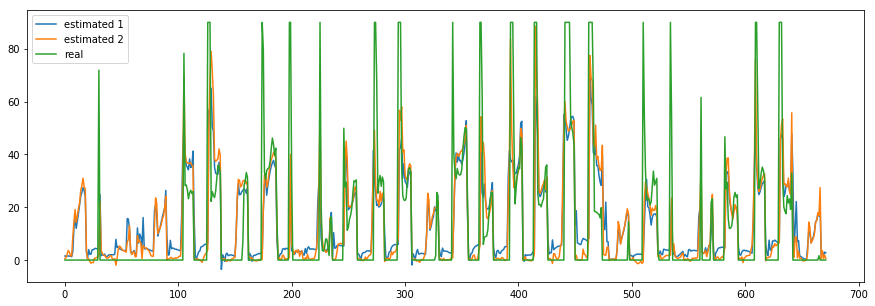

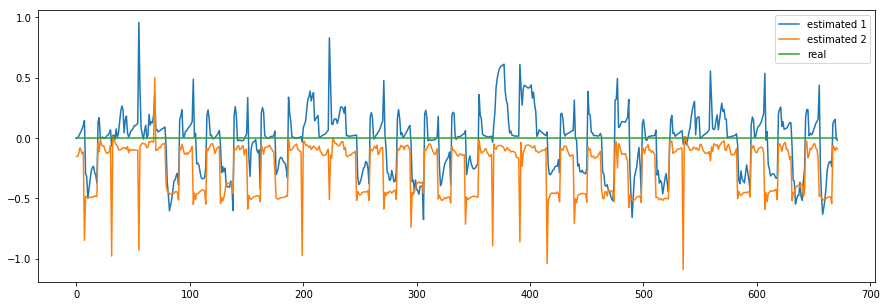

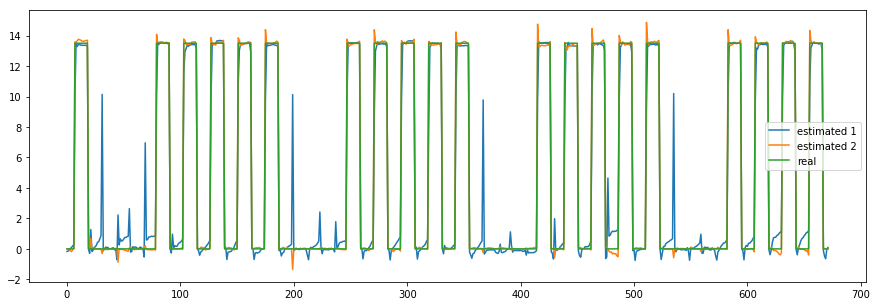

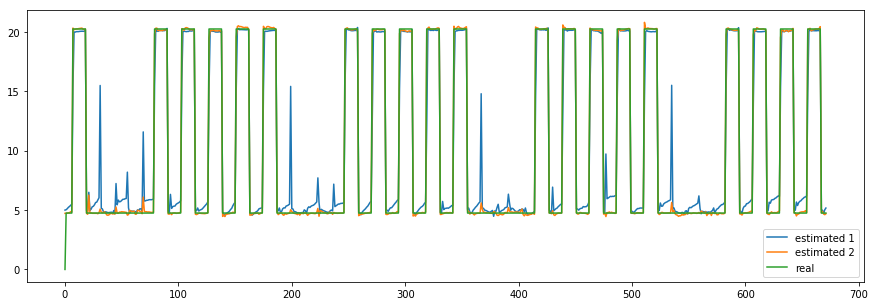

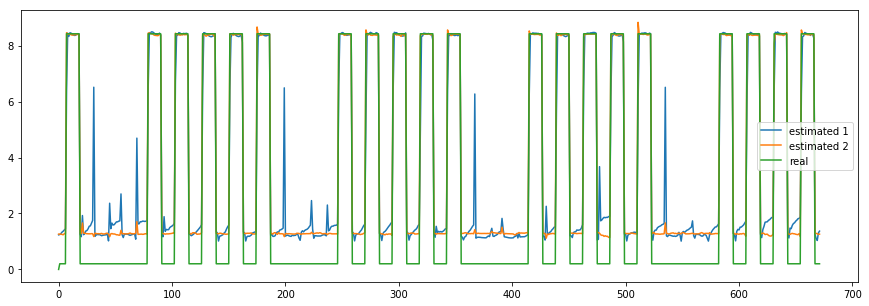

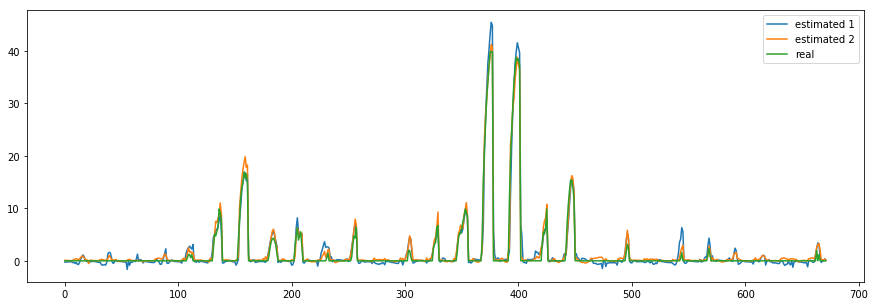

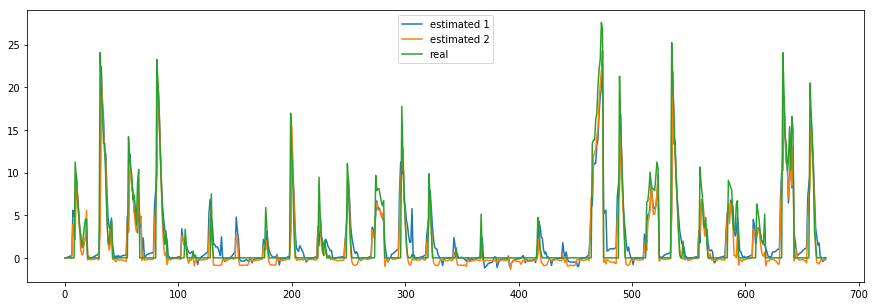

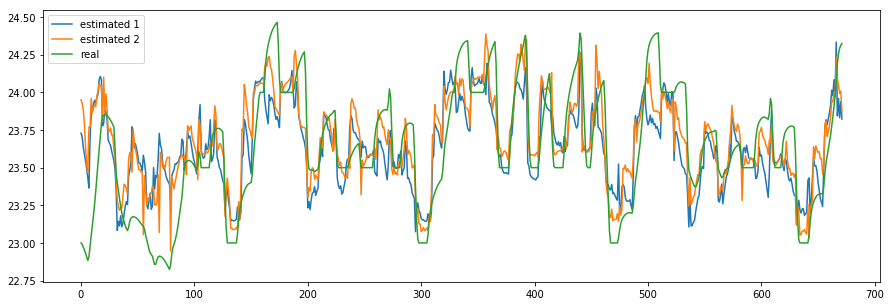

In [13]:
for i in range(8):
    plt.figure(figsize = [15,5])
    plt.plot(est_out[:,i],label = 'estimated 1')
    plt.plot(est_out_2[:,i],label = 'estimated 2')
    plt.plot(output_dat[:,i],label = 'real')
    plt.legend()

In [27]:
sample2 = trainDataset[500]
input_dat2 = sample2[0]
output_dat2 = sample2[1]

input_dat2 = torch.Tensor(input_dat2[np.newaxis,:,:])
input_dat2 = input_dat2.to(device)

est_out2 = model(input_dat2)
est_out2_2 = model2(input_dat2)


In [28]:
est_out2 = est_out2.detach().cpu().numpy()
est_out2 = est_out2.reshape(672,8)

est_out2_2 = est_out2_2.detach().cpu().numpy()
est_out2_2 = est_out2_2.reshape(672,8)

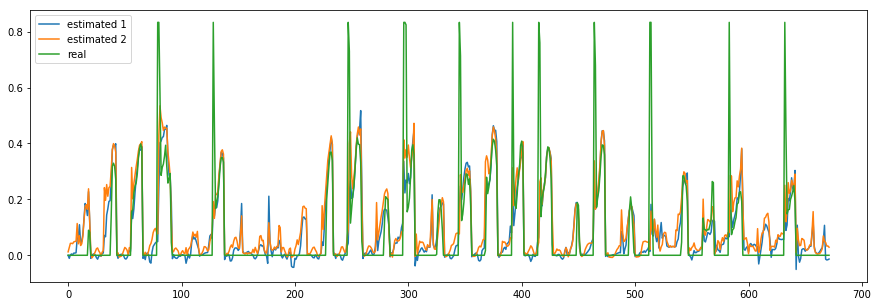

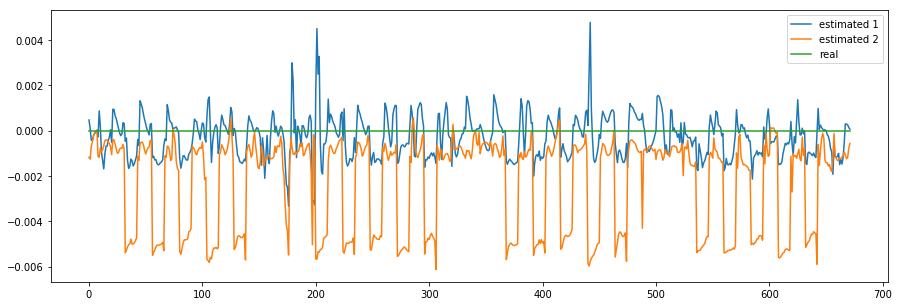

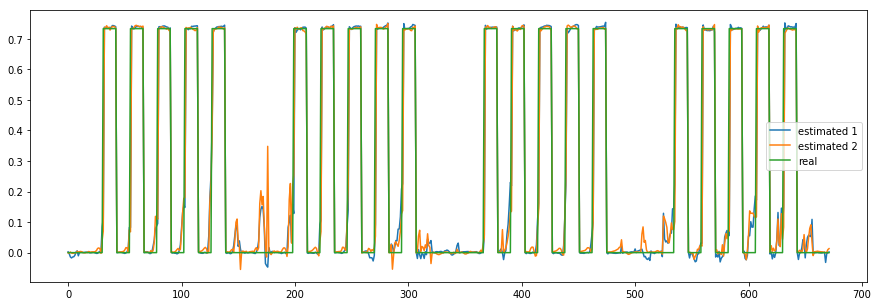

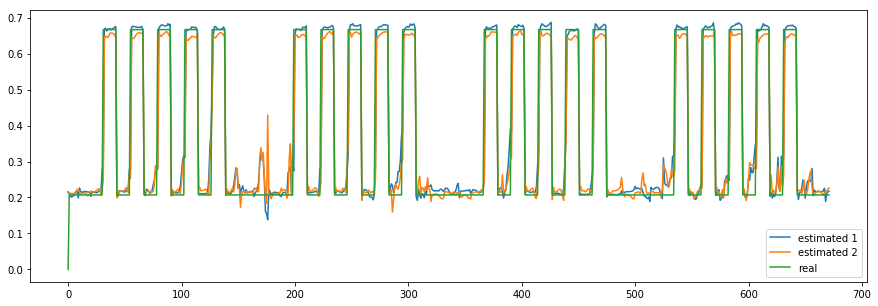

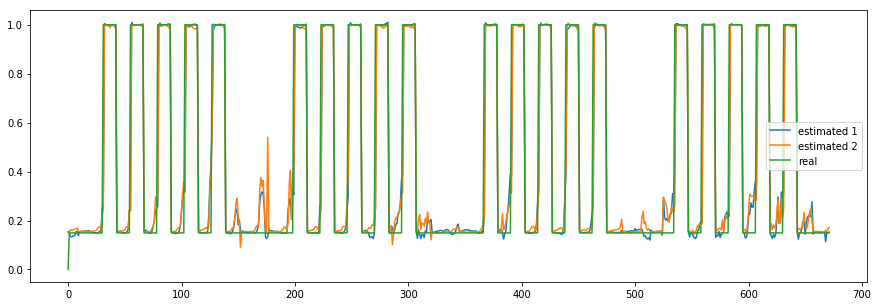

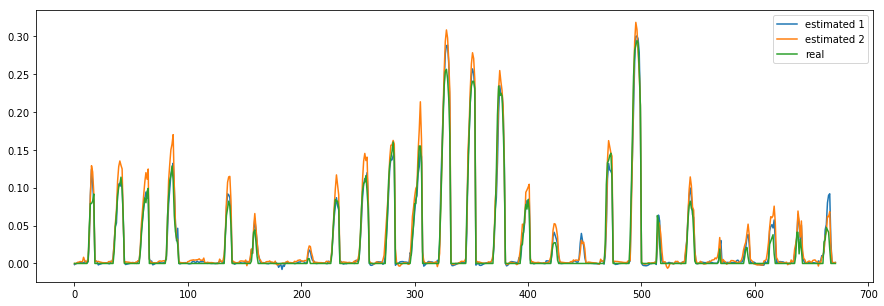

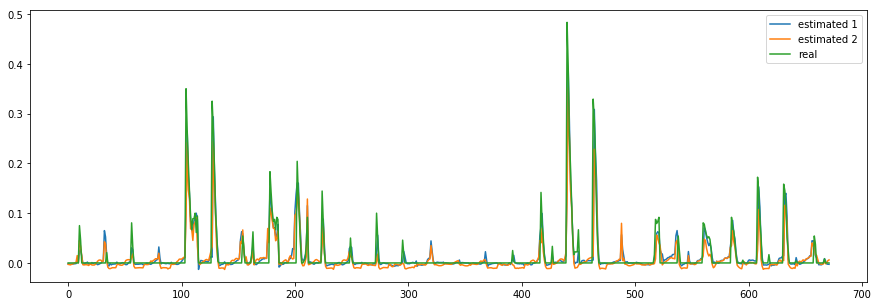

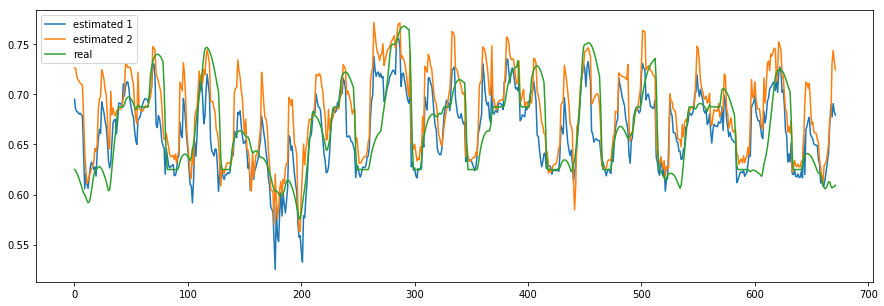

In [29]:
for i in range(8):
    plt.figure(figsize = [15,5])
    plt.plot(est_out2[:,i],label = 'estimated 1')
    plt.plot(est_out2_2[:,i],label = 'estimated 2')
    plt.plot(output_dat2[:,i],label = 'real')
    plt.legend()

In [30]:
est_out2_2 = est_out2_2 * (M - m + np.finfo(float).eps) + m
est_out2 = est_out2 * (M - m + np.finfo(float).eps) + m
output_dat2 = output_dat2 * (M - m + np.finfo(float).eps) + m

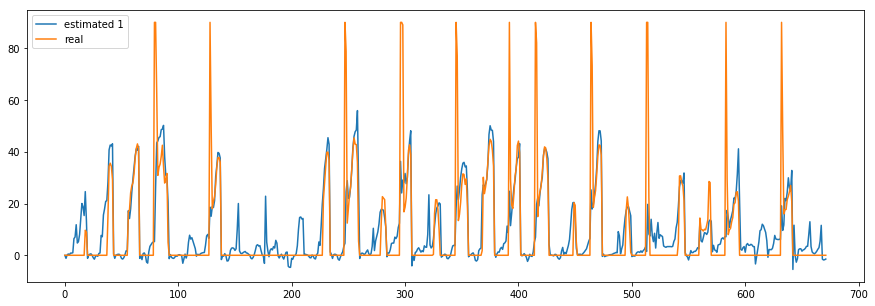

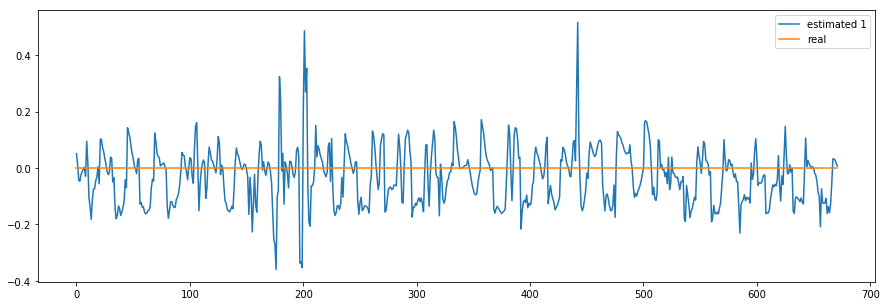

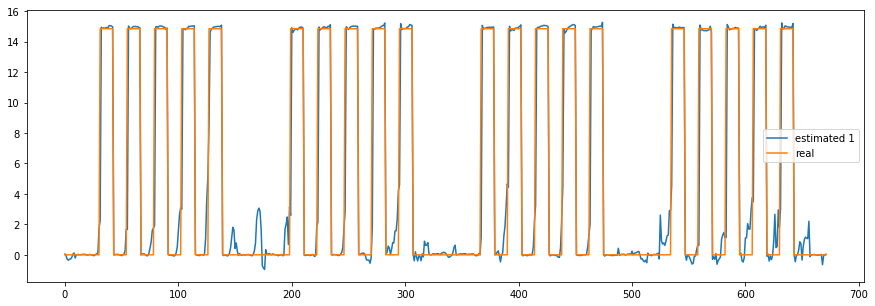

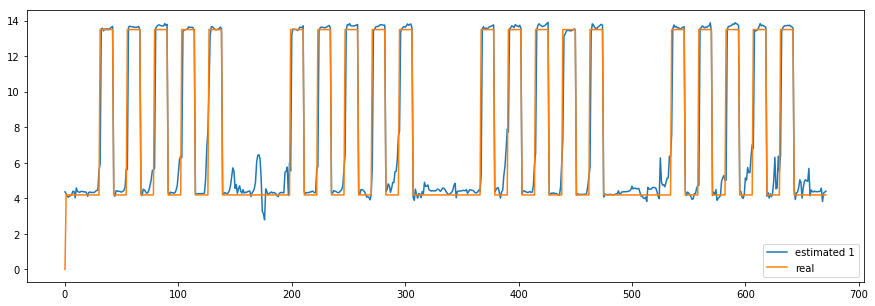

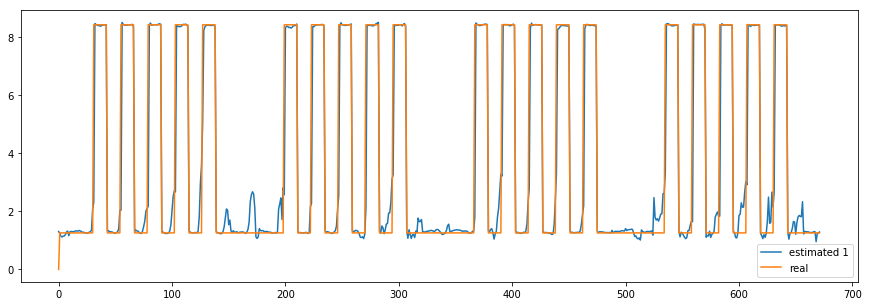

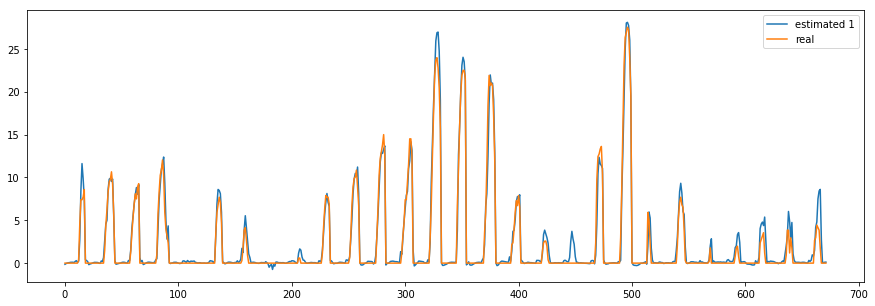

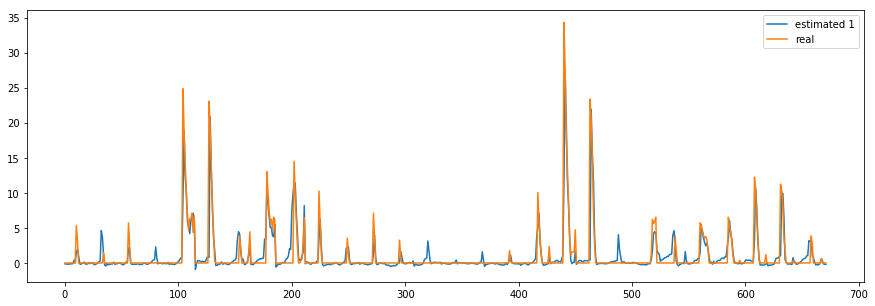

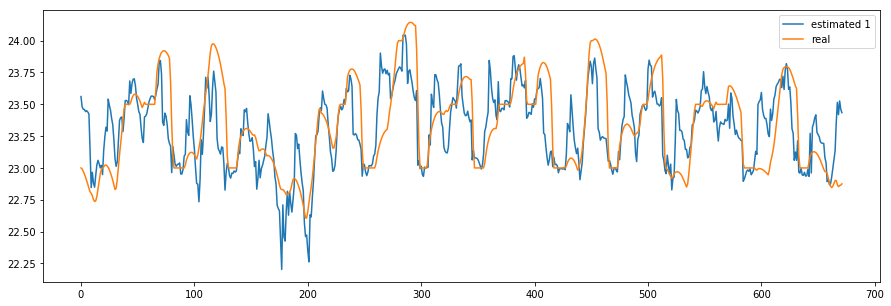

In [33]:
for i in range(8):
    plt.figure(figsize = [15,5])
    plt.plot(est_out2[:,i],label = 'estimated 1')
    #plt.plot(est_out2_2[:,i],label = 'estimated 2')
    plt.plot(output_dat2[:,i],label = 'real')
    plt.legend()